In [1]:
#Librerías
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

In [3]:
def datos_sesgados(sesgo,cantidad,maximo):
    aleatorios=stats.skewnorm.rvs(sesgo,loc=2.5,size=cantidad,random_state=0)
    aleatorios=aleatorios+abs(aleatorios.min())
    aleatorios=np.round(aleatorios,2)/aleatorios.max()*maximo
    return np.round(aleatorios,1)

In [4]:
edades=datos_sesgados(3,1000000,62)

In [5]:
edades

array([37.6, 29.9, 32.8, ..., 34.1, 29.9, 33. ])

In [6]:
edades.min()

np.float64(15.4)

In [7]:
edades.max()

np.float64(62.0)

In [8]:
edades.mean()

np.float64(30.1375047)

In [9]:
#Muestra
tamano_muestra=100
muestra=np.random.choice(edades,tamano_muestra)
muestra

array([25.2, 32.1, 29.7, 27.3, 44.6, 31. , 35.8, 28.8, 33.1, 27.1, 29.4,
       34.8, 32.3, 31.2, 26.3, 28.6, 32.8, 21.1, 23.7, 31. , 31.1, 32.7,
       34.8, 26.8, 32.1, 43.3, 30.3, 22.1, 26.9, 22.6, 27.7, 30.2, 33.4,
       30.8, 32.6, 23.3, 34.3, 23.3, 29.9, 31.4, 27.4, 28.4, 29.7, 41. ,
       35.8, 30.7, 31. , 28.8, 26.1, 24.2, 26. , 38.8, 26.1, 34.8, 32.1,
       26.2, 27.2, 24.6, 32.3, 30.8, 33.9, 32.3, 28.8, 33.8, 28.3, 25.4,
       24.6, 26.9, 24.8, 32.2, 28.2, 31.9, 40.4, 30.8, 27. , 27.7, 23.4,
       20.4, 27.9, 20.8, 29. , 35.6, 32.6, 22.8, 29.2, 30.3, 29.7, 27.4,
       32.8, 27.7, 27.3, 31.6, 27.6, 27.5, 31.7, 25.8, 25. , 32. , 26.9,
       38.4])

In [10]:
muestras_generadas=np.array([])
num_muestras=1000
for i in range(num_muestras):
    muestras_generadas=np.append(muestras_generadas,np.random.choice(edades,tamano_muestra,replace=True))

muestras_generadas=muestras_generadas.reshape(-1,tamano_muestra)
muestras_generadas

array([[26.6, 23.3, 27.7, ..., 25.1, 26.1, 33. ],
       [23.2, 29.9, 33.2, ..., 27. , 27.3, 28.1],
       [25. , 28.6, 31.7, ..., 30.2, 32.1, 36.1],
       ...,
       [32.8, 30.6, 29.8, ..., 31.4, 29.1, 24.6],
       [25.4, 25.2, 38.2, ..., 24.6, 30.1, 37.6],
       [23.2, 25.2, 32.3, ..., 35.1, 25.5, 28.3]])

In [11]:
muestras_generadas.shape

(1000, 100)

##Distribución muestral de la media


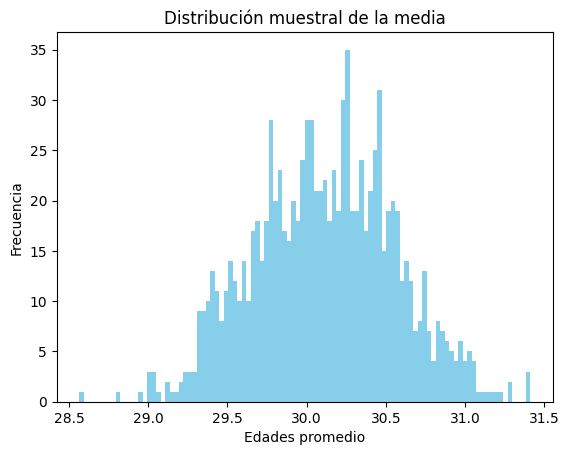

In [12]:
plt.hist(muestras_generadas.mean(axis=1),bins=100,color="skyblue")
plt.xlabel("Edades promedio")
plt.ylabel("Frecuencia")
plt.title("Distribución muestral de la media")
plt.show()


##Intervalo de confianza

In [13]:
int_confianza= np.quantile(muestras_generadas.mean(axis=1),[0.025,0.975])
int_confianza

array([29.3069, 30.9712])

In [14]:
promedios_muestras=muestras_generadas.mean(axis=1)
media=promedios_muestras.mean()
media

np.float64(30.112544999999997)

In [15]:
q_025=np.quantile(promedios_muestras,0.025)
q_025

np.float64(29.3069)

In [16]:
q_0975=np.quantile(promedios_muestras,0.975)
q_0975

np.float64(30.971200000000003)

In [17]:
media_inicial=muestra.mean()
media_inicial

np.float64(29.679000000000006)

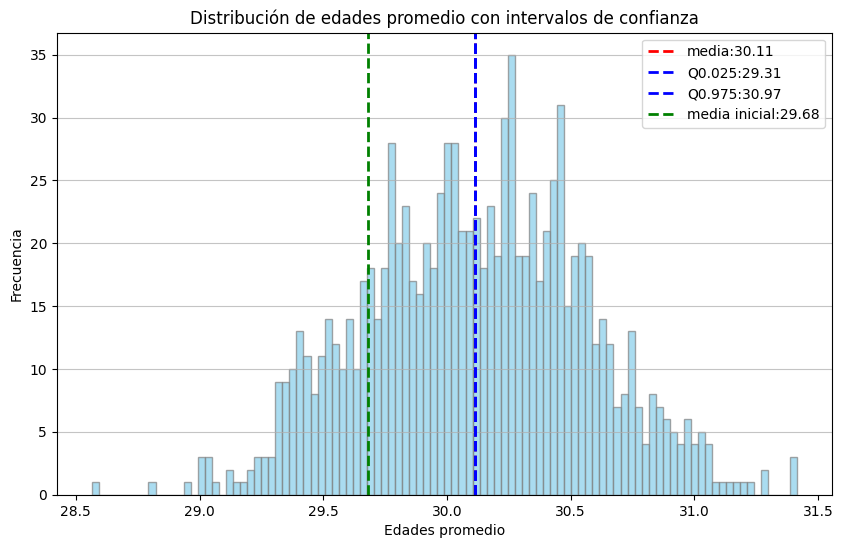

In [18]:
#Crear el histrograma y agregar las líneas de los cuantiles y la media
plt.figure(figsize=(10,6))
plt.hist(promedios_muestras,bins=100,color="skyblue",edgecolor="gray",alpha=0.7)
plt.axvline(media,color="red",linestyle="--",linewidth=2, label=f'media:{media:.2f}')
plt.axvline(media,color="blue",linestyle="--",linewidth=2, label=f'Q0.025:{q_025:.2f}')
plt.axvline(media,color="blue",linestyle="--",linewidth=2, label=f'Q0.975:{q_0975:.2f}')
plt.axvline(media_inicial,color="green",linestyle="--",linewidth=2, label=f'media inicial:{media_inicial:.2f}')
#Añadir etiquetas y leyenda
plt.xlabel("Edades promedio")
plt.ylabel("Frecuencia")
plt.title("Distribución de edades promedio con intervalos de confianza")
plt.legend()
plt.grid(axis="y",alpha=0.75)
plt.show()

## EJERCICIO CON TESLA

In [19]:
from datetime import datetime

now = datetime.now()
dt_string = now.strftime("%d/%m/%Y")

In [20]:
import yfinance as yf
import pandas as pd
import numpy as np

In [21]:
Ticker = "TSLA"
Start_Date = "2024-03-02"
End_Date  = "2025-03-01"
data = yf.download(Ticker, Start_Date, End_Date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [22]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2024-03-04,188.139999,199.750000,186.720001,198.729996,134334900
2024-03-05,180.740005,184.589996,177.570007,183.050003,119660800
2024-03-06,176.539993,181.580002,173.699997,179.990005,107920900
2024-03-07,178.649994,180.039993,173.699997,174.350006,102129000
2024-03-08,175.339996,182.729996,174.699997,181.500000,85315300


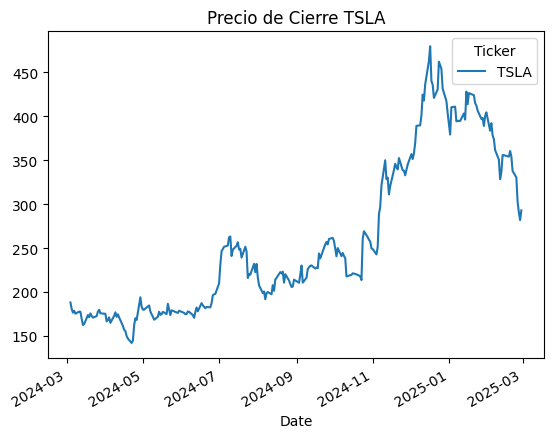

In [23]:
data['Close'].plot(title=f"Precio de Cierre {Ticker}")
plt.show()

In [24]:
datos = pd.DataFrame(data['Close'])
datos

Ticker,TSLA
Date,
2024-03-04,188.139999
2024-03-05,180.740005
2024-03-06,176.539993
2024-03-07,178.649994
2024-03-08,175.339996
...,...
2025-02-24,330.529999
2025-02-25,302.799988
2025-02-26,290.799988


In [25]:
datos['Log_Return'] = np.log(datos['TSLA'] / datos['TSLA'].shift(-1))
datos

Ticker,TSLA,Log_Return
Date,,
2024-03-04,188.139999,0.040127
2024-03-05,180.740005,0.023512
2024-03-06,176.539993,-0.011881
2024-03-07,178.649994,0.018702
2024-03-08,175.339996,-0.013764
...,...,...
2025-02-24,330.529999,0.087625
2025-02-25,302.799988,0.040437
2025-02-26,290.799988,0.030906


In [26]:
datos_invertidos = datos[::-1].fillna(0)
datos_invertidos

Ticker,TSLA,Log_Return
Date,,
2025-02-28,292.980011,0.000000
2025-02-27,281.950012,-0.038375
2025-02-26,290.799988,0.030906
2025-02-25,302.799988,0.040437
2025-02-24,330.529999,0.087625
...,...,...
2024-03-08,175.339996,-0.013764
2024-03-07,178.649994,0.018702
2024-03-06,176.539993,-0.011881


In [27]:
# Muestra
import random
#tamano_muestra = random.randint(1, 365)
tamano_muestra = 100
muestra = datos_invertidos['Log_Return'].head(tamano_muestra)
muestra

,Log_Return
Date,
2025-02-28,0.000000
2025-02-27,-0.038375
2025-02-26,0.030906
2025-02-25,0.040437
2025-02-24,0.087625
...,...
2024-10-10,0.091924
2024-10-09,0.009504
2024-10-08,0.014211


In [28]:
muestras_generadas = np.array([])
num_muestras = 1000
for i in range(num_muestras):
    muestras_generadas = np.append(muestras_generadas, np.random.choice(muestra, tamano_muestra, replace = True))

muestras_generadas = muestras_generadas.reshape(-1, tamano_muestra)
muestras_generadas

array([[ 0.00198997, -0.01512401,  0.09192354, ...,  0.01416459,
        -0.03837459,  0.03420597],
       [ 0.00903804,  0.06274404, -0.02863001, ..., -0.00531327,
        -0.07099117,  0.01738264],
       [ 0.08762494,  0.02346665,  0.01778725, ..., -0.03019697,
        -0.03480163, -0.03733454],
       ...,
       [ 0.02346665,  0.02001831, -0.01835529, ...,  0.01591402,
        -0.03397975, -0.0858069 ],
       [ 0.01145549,  0.01738264, -0.07099117, ..., -0.03837459,
         0.000281  ,  0.04797223],
       [-0.03480163, -0.03019697, -0.03733454, ..., -0.13759466,
        -0.05202109,  0.02496978]])

In [29]:
# Seleccionar 4 índices aleatorios entre 0 y 999
indices_aleatorios = np.random.choice(muestras_generadas.shape[0], size=4, replace=False)

# Obtener las 4 filas aleatorias
filas_aleatorias  = muestras_generadas[indices_aleatorios]
filas_aleatorias

array([[-0.00236407, -0.07099117, -0.07895505,  0.00402915,  0.00571381,
        -0.00622485,  0.05074526, -0.02120595, -0.02198854,  0.02001831,
        -0.07869718,  0.01778725,  0.02175655,  0.00487362,  0.00571381,
         0.01600571,  0.03356929,  0.06274404, -0.00531327, -0.02198854,
        -0.0858069 ,  0.06274404, -0.0014697 ,  0.01591402,  0.00198997,
         0.01591402,  0.02496978, -0.01512401, -0.02832831,  0.03305021,
         0.00402915, -0.07869718,  0.00571381, -0.02198854, -0.05761136,
         0.00903804,  0.00086054, -0.05466435,  0.01582717,  0.04797223,
        -0.00186905,  0.03451714,  0.06274404, -0.02120595, -0.0283279 ,
         0.04145067,  0.03090591, -0.00146341,  0.000281  ,  0.01154033,
         0.00402915,  0.02001831, -0.00622485, -0.0858069 , -0.07869718,
        -0.0858069 , -0.02120595,  0.05074526,  0.00050657, -0.00236407,
         0.00050657, -0.03572414, -0.0283279 , -0.05466435,  0.02001831,
        -0.00236407,  0.00198997, -0.03572414, -0.0

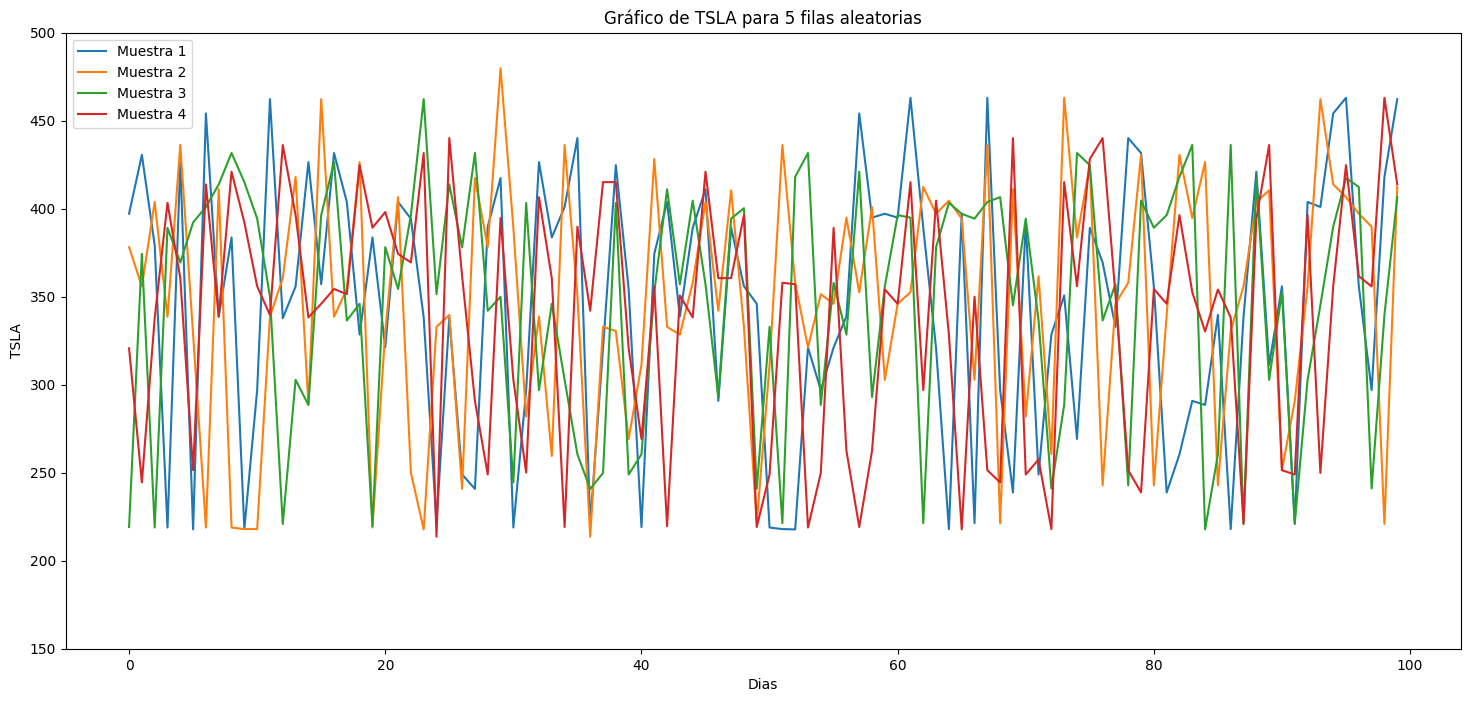

In [30]:
# Configurar el gráfico
plt.figure(figsize=(18, 8))

# Iterar sobre las filas aleatorias y graficarlas
for i in range(4):
    # Crear el DataFrame para la fila aleatoria
    tabla = pd.DataFrame(filas_aleatorias[i], columns=['Log_Return'])

    # Realizar el merge con datos_invertidos
    resultado = pd.merge(tabla, datos_invertidos, left_on='Log_Return', right_on='Log_Return', how='left')

    # Graficar la serie 'TSLA' resultante con un color diferente
    plt.plot(resultado['TSLA'], label=f'Muestra {i+1}')  # Etiqueta cada línea con su índice

# Añadir título y leyenda
plt.ylim(150, 500)
plt.title('Gráfico de TSLA para 5 filas aleatorias')
plt.xlabel('Dias')
plt.ylabel('TSLA')
plt.legend()
plt.show()

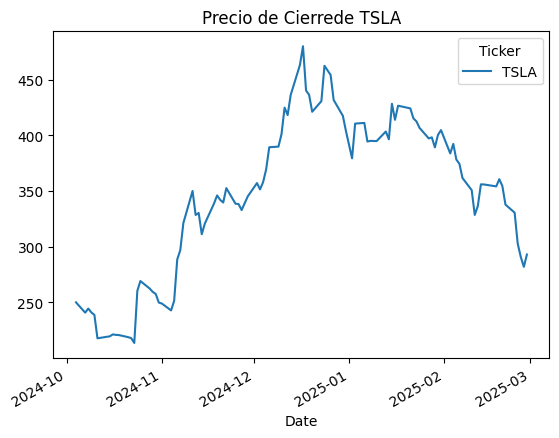

In [31]:
# Graficar solo los últimos 100 datos de 'Close'
data['Close'].iloc[-100:].plot(title=f"Precio de Cierrede {Ticker}")

# Mostrar el gráfico
plt.show()

In [42]:
#Procedemos a crear una funcion que modele el proceso estocastico
def MGB_acciones(mu,sigma,data,col_name,steps):

    #Los parametros de la funcion son:
    #mu -> Tasa de crecimiento esperada
    #sigma -> volatilidad del activo
    #data -> pandas df que contiene los retornos logaritmicos del activo en dias
    #col_name -> nombre de la columna de los retornos
    #steps -> numero de pasos hacia adelante en el proceso estocastico

    dt=1/252 # son solo 252 dias de traiding en el año.
    s0=data[col_name].iloc[-1] #Tomamos el ultimo elemento de los precios, ya que este sera el punto de partida
    et_vector=np.random.normal(loc=0, scale=1, size=steps) # Vector de numeros aletorios de media 0 y desviacion estandar 1
    exp_vector = np.exp((mu - (sigma**2) / 2) * dt + sigma * et_vector * np.sqrt(dt))

    st_1=[]

    for i in range(0,steps):

        if i==0:
            s=s0*exp_vector[0]
        else:
            s=st_1[i-1]*exp_vector[i]

        st_1.append(s)


    return st_1

# Cálculo de parámetros
log_retornos = datos_invertidos['Log_Return'].dropna()
mu = log_retornos.mean()
sigma = log_retornos.std()

In [43]:
datos_invertidos.head()

Ticker,TSLA,Log_Return
Date,,
2025-02-28,292.980011,0.000000
2025-02-27,281.950012,-0.038375
2025-02-26,290.799988,0.030906
2025-02-25,302.799988,0.040437
2025-02-24,330.529999,0.087625


In [52]:
n_simulaciones = 500
dias_proyeccion = 252

# Obtener la última fecha histórica y calcular las fechas futuras
ultima_fecha_historica = datos_invertidos.index[0]
fechas_futuras = pd.date_range(start=ultima_fecha_historica + pd.offsets.BDay(1), periods=dias_proyeccion, freq='B')

# Crear DataFrame base
Montecarlo_results = datos_invertidos[['TSLA']].rename(columns={'TSLA': 'muestra'})
Montecarlo_results = Montecarlo_results.reindex(Montecarlo_results.index.union(fechas_futuras))

# Diccionario para almacenar simulaciones antes de agregarlas al DataFrame
simulaciones = {}

# Generar simulaciones
for i in range(n_simulaciones):
    simulaciones[f'Sim_{i}'] = MGB_acciones(mu, sigma, datos_invertidos, 'TSLA', dias_proyeccion)

# Convertir a DataFrame y combinar con Montecarlo_results
Montecarlo_results = Montecarlo_results.assign(**pd.DataFrame(simulaciones, index=fechas_futuras))

<ipython-input-52-268b28daa56a>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Montecarlo_results = Montecarlo_results.assign(**pd.DataFrame(simulaciones, index=fechas_futuras))
<ipython-input-52-268b28daa56a>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Montecarlo_results = Montecarlo_results.assign(**pd.DataFrame(simulaciones, index=fechas_futuras))
<ipython-input-52-268b28daa56a>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

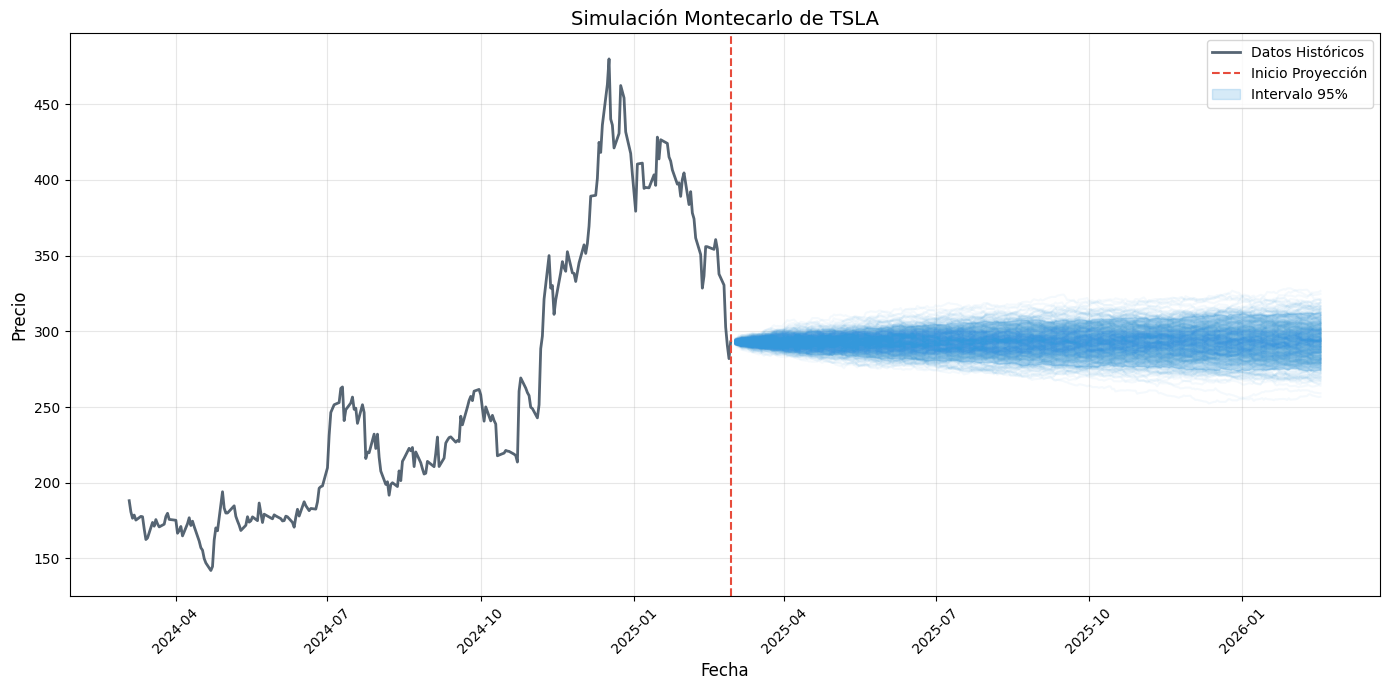

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configuración inicial
np.random.seed(42)
simulaciones = 500
dias_proyeccion = 252

# Cálculo de parámetros estadísticos
log_returns = datos_invertidos['Log_Return'].dropna()
mu, sigma = log_returns.mean(), log_returns.std()

# Función optimizada para generar múltiples simulaciones
def generar_simulaciones(mu, sigma, precio_inicial, dias, num_sim):
    dt = 1 / 252
    choques = np.random.normal(size=(num_sim, dias))
    retornos = np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * choques)
    return precio_inicial * retornos.cumprod(axis=1)

# Precio inicial y fechas futuras
precio_inicial = datos_invertidos['TSLA'].iloc[0]
ultima_fecha = datos_invertidos.index[0]
fechas_futuras = pd.date_range(start=ultima_fecha + pd.offsets.BDay(1), periods=dias_proyeccion, freq='B')

# Generar simulaciones y almacenarlas en un DataFrame
trayectorias = generar_simulaciones(mu, sigma, precio_inicial, dias_proyeccion, simulaciones)
sim_df = pd.DataFrame(trayectorias.T, index=fechas_futuras, columns=[f'Sim_{i}' for i in range(simulaciones)])

# Crear DataFrame final
Montecarlo_results = pd.concat([datos_invertidos[['TSLA']].rename(columns={'TSLA': 'muestra'}), sim_df], axis=0)

# Visualización mejorada
plt.figure(figsize=(14, 7))
plt.plot(Montecarlo_results['muestra'].dropna(), color='#2c3e50', lw=2, label='Datos Históricos', alpha=0.8)

# Graficar simulaciones con transparencia
plt.plot(sim_df, alpha=0.05, color='#3498db')

# Línea de inicio de la proyección
plt.axvline(x=ultima_fecha, color='#e74c3c', linestyle='--', label='Inicio Proyección')

# Calcular percentiles
percentil_95 = sim_df.quantile(0.95, axis=1)
percentil_05 = sim_df.quantile(0.05, axis=1)
plt.fill_between(fechas_futuras, percentil_05, percentil_95, color='#3498db', alpha=0.2, label='Intervalo 95%')

# Formateo de la gráfica
plt.title('Simulación Montecarlo de TSLA', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Mostrar primeras filas de los resultados
display(Montecarlo_results.head(10).style.format("{:.2f}")
        .set_caption("Primeras filas de los resultados")
        .background_gradient(subset=['muestra'], cmap='Blues'))